In [ ]:
from time import sleep

import GCode
import GRBL
import numpy as np

from utils import picture

# Spindle Cutting Tests

## Objective
- Play around with Dremel High Speed Cutter 115 in the ER11 spindle

## Test Setup

- Oak Board 63mm x 300mm x 19mm
- Dremel High Speed Cutter "Carving / Engraving" 115.
- CSI3010SW dialed all the way up.

# Code:

In [6]:
cnc = GRBL.GRBL(port="/dev/cnc_3018")print("Laser Mode: {}".format(cnc.laser_mode))def init(feed = 10):    program = GCode.GCode()    program.G21() # Metric Units    program.G91() # Absolute positioning.    program.G1(F=feed)     return programdef end():    program = GCode.GCode()    return program

Laser Mode: 0.0


In [25]:
def test_program(feed=10):
    prog = GCode.GCode()
    prog.M3(S=10000)
    prog.G0(Z=-2)
    dZ = -0.1
    dX = 20
    X = 0
    Z = 0
    for loops in range(10):
        prog.G1(Z=dZ, F=10)
        prog.G1(X=dX, F=feed)
        X += dX
        Z += dZ
    prog.M3(S=0)
    prog.G0(Z=-Z)
    prog.G0(X=-X)
    prog.G0(Z=2)
    return prog


In [26]:
test_program()


<GCode>[cmds=26]

In [28]:
np.round(0.9999999999999999, 4)


1.0

In [31]:
def test_program(feed=10):
    prog = GCode.GCode()
    prog.M3(S=10000)
    prog.G0(Z=-2)
    dZ = -0.1
    dX = 20
    X = 0
    Z = 0
    for loops in range(10):
        prog.G1(Z=dZ, F=10)
        prog.G1(X=dX, F=feed)
        X += dX
        Z += dZ
    prog.M3(S=0)
    prog.G0(Z=np.round(-Z, 4))  # TODO: Add this to core library.
    prog.G0(X=np.round(-X, 4))
    prog.G0(Z=2)
    return prog


In [32]:
test_run = GCode.GCode()
# Lower head to touching part manually.
# TODO: Get z-axis probe.
# Then lift by 2.
test_run.G0(Z=2)
for XFeed in [10, 25, 50]:
    test_run += test_program(feed=XFeed)


In [33]:
test_run


<GCode>[cmds=79]

In [34]:
gcode_file = "SpindleTests-Copy1.gcode"


In [35]:
test_run.save(gcode_file)

del test_run
test_run = GCode.GCode()

test_run.load(gcode_file)


In [36]:
test_run.buffer[0:5]


['G0 Z2', 'M3 S10000', 'G0 Z-2', 'G1 F10 Z-0.1', 'G1 X20 F10']

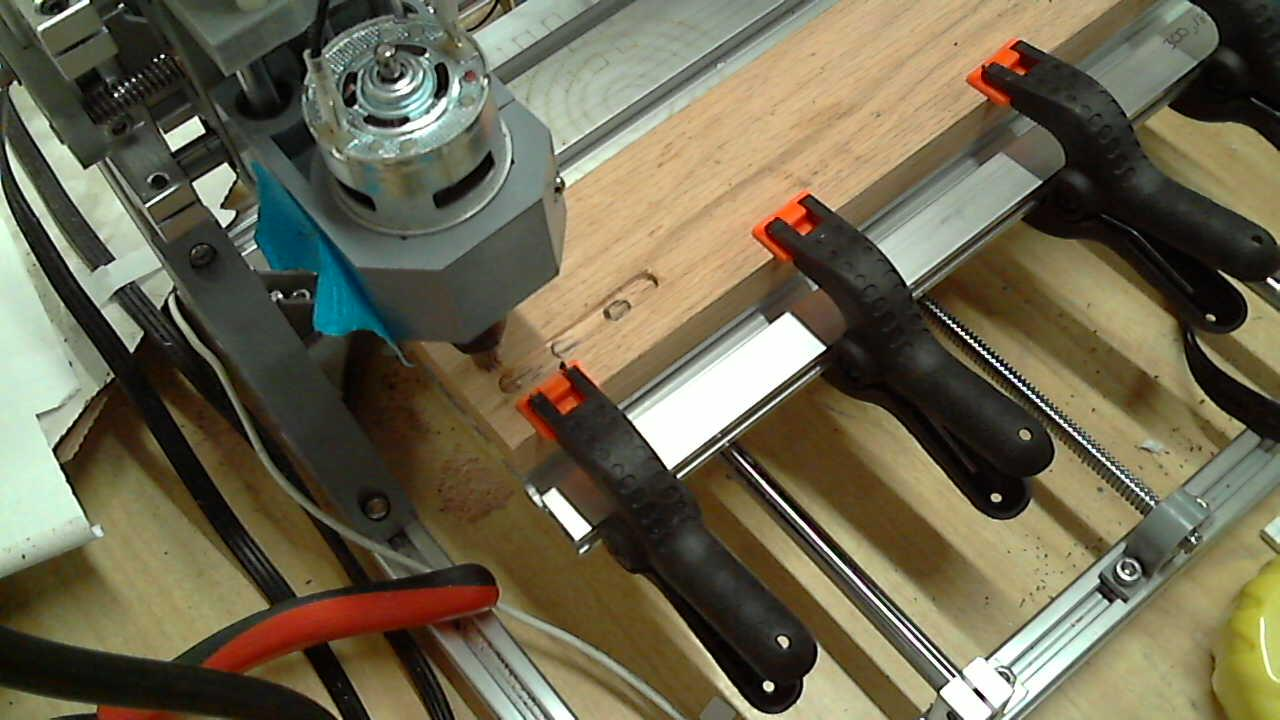

In [37]:
picture()


In [46]:
cnc.cmd("?")


['ok',
 '<Idle|MPos:20.000,0.000,0.020|Bf:15,127|FS:0,0|WCO:0.000,0.000,0.000>',
 'ok']

In [47]:
cnc.reset()


In [48]:
while 1:
    try:
        cnc.run(test_run)
        while 1:
            print(cnc.status)
            sleep(5)
    except KeyboardInterrupt as error:
        print("Feed Hold")
        cnc.cmd("!")
        print("^C")
        break
    except:
        raise


^C


AssertionError: 

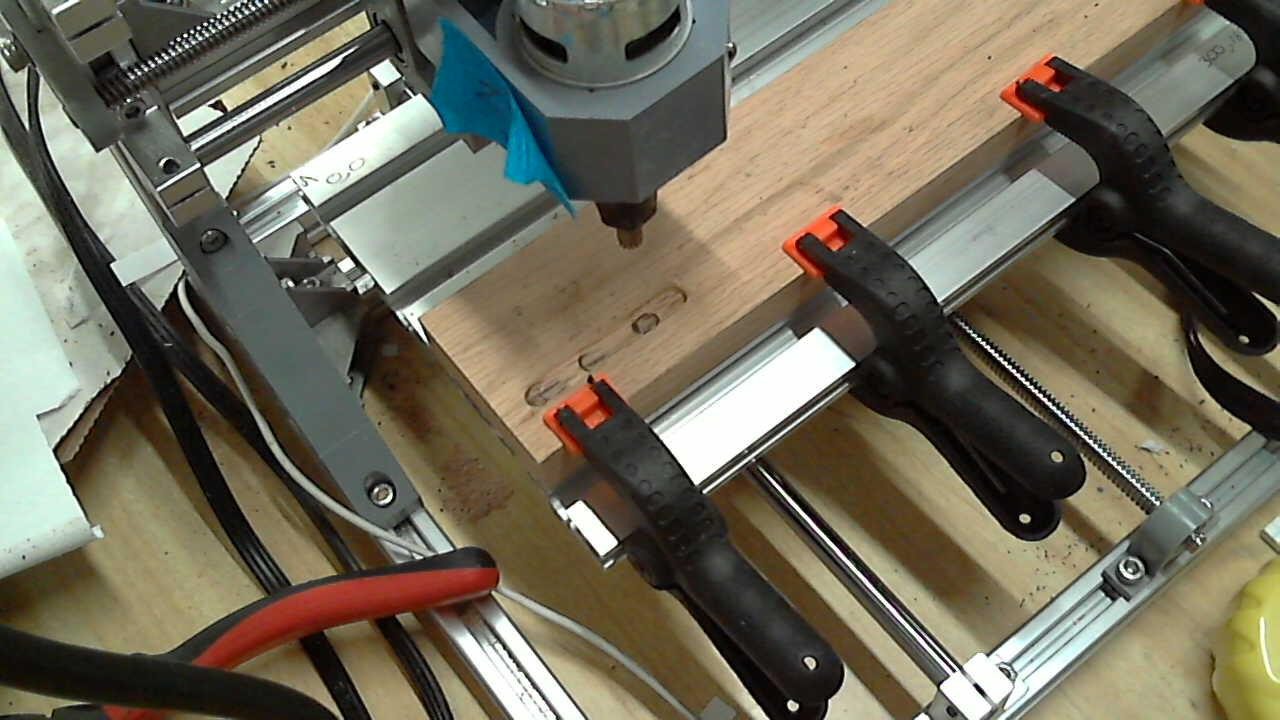

In [53]:
picture()


# Test Aborted.

Cuts were way too aggressive.